<a href="https://colab.research.google.com/github/antonionipo/Data-analysis-for-populism-in-presidential-speeches/blob/main/data_analysis_for_populism_in_presidential_speeches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis for populism in presidencial speeches

Abstract
What is the most efficient way to ideologically classify a speech? Given the volume of content produced, this dissertation compares two machine learning tools for this purpose. The first is a computational learning model built using RStudio software, while the second is Chat-GPT. The classification object of this project will be official presidential speeches from Brazil (1988-2019), focusing on populism as the ideological aspect. Words characterizing relevant thematic areas will also be analyzed in a more in-depth investigation of the texts to understand the phenomenon of populism. Finally, the efficiency of these two speech classification tools into populist or non-populist will be measured by comparing their results with those obtained by a team of experts. The results obtained will contribute to the methodological debate and aim to provide a tool that facilitates this crucial work for Political Science, being also relevant to society by proposing an analysis of populism among Brazil's executive representatives, a topic of social interest.

Canto (2025)

## Research problem

What is the most efficient way to ideologically classify a speech?


## Data Understanding

Para o desenvolvimento desta pesquisa, foi utilizada a base de dados disponibilizada pelo artigo de Ricci (2021) publicado na Revista Brasileira de Ciências Sociais. Esta base contém uma classificação de discursos presidenciais oficiais brasileiros em populistas ou não populistas sob o critério de contraposição de povo e elite (Hawkins e Kaltwasser, 2017). Nesta base, foi aplicada, inicialmente, a técnica de dicionário para filtrar as potencialmente populistas, com um dicionário feito para indicar frases com palavras referentes ao povo e outro, para a elite. Apenas as que continham palavras de ambos os dicionários foram manualmente classificadas e é essa a amostra que será utilizada nesta análise, podendo ser inteiramente replicada.
É cabível ressaltar que a classificação manual feita por estes autores especialistas é tido como o padrão ouro dentro da análise de texto. Tomando estes dados como corretos, serão aplicadas diferentes técnicas de aprendizado supervisionado e não supervisionado para, observando o desempenho destas, discutir sobre suas aplicações na Ciência Política, assim como em outras áreas de conhecimento. O objetivo central é, desta maneira, a comparação, a contraposição destas diferentes formas de classificação automatizada.
Inicialmente, será feita uma análise do período pós-redemocratização brasileira (1988-2019), de maneira a obter  a pluralidade necessária de discursos, com a comparação e visualização de mudanças ocorridas tanto na frequência quanto na variedade de elementos populistas, formando uma base que contém períodos e elementos populistas e não-populistas.

Canto (2025)

**Desenho metodológico para construção da base de dados**

"Com desenho metodológico misto (mixed methods design), a alternativa que adotamos se divide em quatro etapas. Na primeira, combinamos a mineração de texto (text mining) com a abordagem de dicionário (dictionary-based approach) (Grimmer e Stewart, 2013; Lucas et al., 2015; Wilkerson e Casas, 2017; Welbers et al., 2017).10 Dividimos todos os discursos em sentenças e, a partir de um dicionário pré-definido de palavras, selecionamos as frases com potencial de expressar conteúdo populista. Nas demais etapas, avaliamos qualitativamente se os trechos selecionados de fato caracterizam conteúdo populista, ou seja, se neles o representante expressa o antagonismo entre uma elite má, conspiradora e corrupta, que usurpa o povo bom, puro e comum. Essas quatro etapas são apresentadas a seguir."

Ricci (2021)

## Data Preparation

### Instalação de pacotes

In [1]:
!pip install spacy
!python -m spacy download pt_core_news_sm
!pip install openai==0.28
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 47.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import kagglehub
import os
path = kagglehub.dataset_download("leadbest/googlenewsvectorsnegative300")

In [3]:
# Find the .bin file inside the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".bin"):  # Assuming the Word2Vec file ends with .bin
        file_path = os.path.join(path, filename)
        break  # Stop after finding the first .bin file

### Importação de bibliotecas

In [115]:
# Bibliotecas gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import unicodedata
import spacy
from wordcloud import WordCloud

# Downloads
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('rslp')

# Bibliotecas de tratamento de dados Natural Language Processing
from nltk import word_tokenize, download
from nltk.stem import LancasterStemmer, WordNetLemmatizer, RSLPStemmer
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from gensim.models import KeyedVectors
from imblearn.over_sampling import SMOTE

# Divisão de amostra
from sklearn.model_selection import train_test_split

# Modelos Machine Learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Modelos Deep Learning
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.callbacks import EarlyStopping

# Validação Cruzada
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Tuning de Hiper-Parâmetros
from sklearn.model_selection import GridSearchCV

# Generative AI
import openai

# Métricas
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


### Leitura de dados

In [5]:
# Leitura da base
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Populism/populismo_final.csv', encoding='latin-1')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,ordem,pres_nick_name,pres_label,date,frases,n.carac,nwords,povo,elite,potencial,mauricio_class,davi_class,paolo_class,discordancia,populismo
0,Sarney-I-1985-04-21-0006,210,José Sarney,Sarney-I,1985-04-21,Deus é testemunha de que eu*lhe entregaria o m...,132,23,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sarney-I-1985-04-21-0006,211,José Sarney,Sarney-I,1985-04-21,Eterniza-se com ele a legenda do idealismo que...,167,30,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sarney-I-1985-04-21-0006,212,José Sarney,Sarney-I,1985-04-21,"Ninguém o excedeu no amor do povo, que acompan...",196,34,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Sarney-I-1985-04-21-0006,213,José Sarney,Sarney-I,1985-04-21,"Lágrimas temos todos, das fronteiras escondida...",123,21,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sarney-I-1985-04-21-0006,214,José Sarney,Sarney-I,1985-04-21,"Aqui estou, meus compatriotas, sob o peso de u...",84,16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Preparação do DataFrame

In [6]:
# Cópia do dataframe
populista = df.copy()

### Tratamento de dados

#### Retirar colunas irrelevantes

In [7]:
populista.drop(['id', 'ordem', 'pres_nick_name', 'n.carac', 'nwords', 'povo', 'elite', 'mauricio_class', 'davi_class', 'paolo_class'], axis=1, inplace=True)
populista.head()

,pres_label,date,frases,potencial,discordancia,populismo
0,Sarney-I,1985-04-21,Deus é testemunha de que eu*lhe entregaria o m...,0.0,0.0,0.0
1,Sarney-I,1985-04-21,Eterniza-se com ele a legenda do idealismo que...,0.0,0.0,0.0
2,Sarney-I,1985-04-21,"Ninguém o excedeu no amor do povo, que acompan...",1.0,0.0,0.0
3,Sarney-I,1985-04-21,"Lágrimas temos todos, das fronteiras escondida...",0.0,0.0,0.0
4,Sarney-I,1985-04-21,"Aqui estou, meus compatriotas, sob o peso de u...",0.0,0.0,0.0


#### Formatação de dados

In [8]:
# Convert the 'date' column to datetime objects
populista['date'] = pd.to_datetime(populista['date'], format='%Y-%m-%d')

# Convert the 'potencial', 'discordancia', and 'populismo' to Boolean
populista['potencial'] = populista['potencial'].astype(bool)
populista['discordancia'] = (populista['discordancia']).astype(bool)
populista['populismo'] = (populista['populismo']).astype(bool)

# Convert 'frases' and 'pres_label' to string
populista['frases'] = populista['frases'].astype(str)
populista['pres_label'] = populista['pres_label'].astype(str)

# Display info to verify the change
populista.info()
populista.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137447 entries, 0 to 137446
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   pres_label    137447 non-null  object        
 1   date          137447 non-null  datetime64[ns]
 2   frases        137447 non-null  object        
 3   potencial     137447 non-null  bool          
 4   discordancia  137447 non-null  bool          
 5   populismo     137447 non-null  bool          
dtypes: bool(3), datetime64[ns](1), object(2)
memory usage: 3.5+ MB


,pres_label,date,frases,potencial,discordancia,populismo
0,Sarney-I,1985-04-21,Deus é testemunha de que eu*lhe entregaria o m...,False,False,False
1,Sarney-I,1985-04-21,Eterniza-se com ele a legenda do idealismo que...,False,False,False
2,Sarney-I,1985-04-21,"Ninguém o excedeu no amor do povo, que acompan...",True,False,False
3,Sarney-I,1985-04-21,"Lágrimas temos todos, das fronteiras escondida...",False,False,False
4,Sarney-I,1985-04-21,"Aqui estou, meus compatriotas, sob o peso de u...",False,False,False


#### Tratamento de dados nulos

In [9]:
populista.isnull().sum()

,0
pres_label,0
date,0
frases,0
potencial,0
discordancia,0
populismo,0


#### Filtro de casos potenciais

In [10]:
populista = populista.loc[populista['potencial'] == True]
populista.drop(columns=['potencial'], inplace=True)
populista.head()

<ipython-input-10-53b584101beb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  populista.drop(columns=['potencial'], inplace=True)


,pres_label,date,frases,discordancia,populismo
2,Sarney-I,1985-04-21,"Ninguém o excedeu no amor do povo, que acompan...",False,False
135,Sarney-I,1985-05-02,"Aqui estão educadores, estudantes, cientistas,...",False,False
446,Sarney-I,1985-05-18,"Na manhã de 15 de janeiro, há tão poucos e den...",False,False
469,Sarney-I,1985-05-18,"Antes, estávamos juntos para, em nome do povo,...",False,False
513,Sarney-I,1985-05-24,"O Nordeste é, sobretudo, um estado de espírito.",False,False


#### Retirada da coluna discordância

A variável será usada para posterior análise comparativa

In [11]:
# Retirado e separado para posterior análise
y1 = populista['discordancia']
populista.drop(columns=['discordancia'], inplace=True)
populista.head()

<ipython-input-11-2fb667e526ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  populista.drop(columns=['discordancia'], inplace=True)


,pres_label,date,frases,populismo
2,Sarney-I,1985-04-21,"Ninguém o excedeu no amor do povo, que acompan...",False
135,Sarney-I,1985-05-02,"Aqui estão educadores, estudantes, cientistas,...",False
446,Sarney-I,1985-05-18,"Na manhã de 15 de janeiro, há tão poucos e den...",False
469,Sarney-I,1985-05-18,"Antes, estávamos juntos para, em nome do povo,...",False
513,Sarney-I,1985-05-24,"O Nordeste é, sobretudo, um estado de espírito.",False


### Análise Exploratória

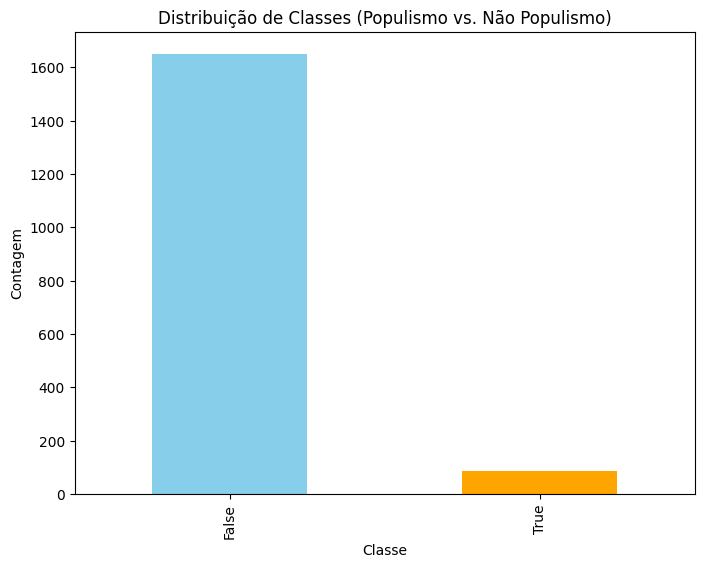

In [12]:
# Distribuição de classes
plt.figure(figsize=(8, 6))
populista['populismo'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribuição de Classes (Populismo vs. Não Populismo)')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

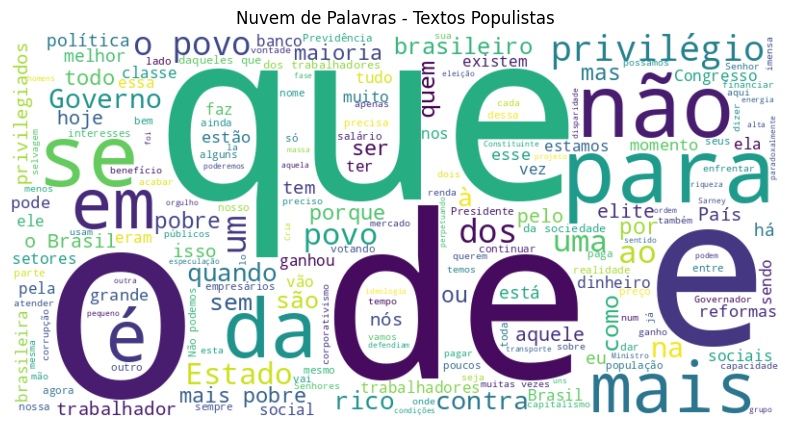

In [13]:
# Nuvem de palavras para textos populistas
populist_texts = ' '.join(populista[populista['populismo'] == True]['frases'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(populist_texts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Textos Populistas')
plt.show()

## Modelling

### Pré processamento

#### Padronziar formato das letras

In [14]:
populista['frases'] = populista['frases'].str.lower().tolist()
populista.head()

,pres_label,date,frases,populismo
2,Sarney-I,1985-04-21,"ninguém o excedeu no amor do povo, que acompan...",False
135,Sarney-I,1985-05-02,"aqui estão educadores, estudantes, cientistas,...",False
446,Sarney-I,1985-05-18,"na manhã de 15 de janeiro, há tão poucos e den...",False
469,Sarney-I,1985-05-18,"antes, estávamos juntos para, em nome do povo,...",False
513,Sarney-I,1985-05-24,"o nordeste é, sobretudo, um estado de espírito.",False


#### Lematização e Stematização

Definindo stop words, e caracteres especiais

In [15]:
nlp = spacy.load("pt_core_news_sm")

stop_words_ptbr = stopwords.words('portuguese')

def remove_accents(text):
    """
    Remove acentos, til e cedilha do texto.
    """
    text = unicodedata.normalize('NFD', text)
    text = re.sub(r'[\u0300-\u036f]', '', text)  # Remove diacríticos (acentos, til)
    text = text.replace('ç', 'c').replace('Ç', 'C')  # Substitui cedilha
    return text


Lematização e Stematização, remoção de stop words, de caracteres especiais, e vetorização-tokenização

In [16]:
# Stemming para português
stemmer = RSLPStemmer()

class StemTokenizer:
    def __init__(self, stop_words=None, use_stemming=False):
        self.stop = stop_words if stop_words else []
        self.use_stemming = use_stemming

    def __call__(self, doc):
        """
        Tokeniza e lematiza ou faz stemming de um documento de texto.
        """
        doc = remove_accents(doc.lower())  # Remove acentos e normaliza para minúsculas
        tokens = nlp(doc)  # Processa com Spacy
        if self.use_stemming:
            return [stemmer.stem(token.text) for token in tokens if token.is_alpha and token.text not in self.stop]
        else:
            return [token.lemma_ for token in tokens if token.is_alpha and token.text not in self.stop]


In [17]:
# Carregar embeddings pré-treinados (ex: Word2Vec em português)
word2vec_model = KeyedVectors.load_word2vec_format(file_path , binary=True)

def text_to_embedding(text, model=word2vec_model, max_len=100):
    """
    Converte texto em uma sequência de embeddings.
    """
    tokens = stem(text)  # Usa o tokenizador já definido
    embeddings = [model[token] if token in model else np.zeros(model.vector_size) for token in tokens]
    embeddings = pad_sequences([embeddings], maxlen=max_len, padding='post', dtype='float32')
    return embeddings[0]

Aplicação da tokenização e lematização

In [18]:
stem = StemTokenizer(stop_words=stop_words_ptbr)
vectorizer = CountVectorizer(tokenizer=stem)

In [19]:
# Mantendo a coluna original "frases" e criando uma nova coluna para a tokenização
populista['tokenized_frases'] = populista['frases'].apply(lambda x: stem(x))

# Visualizando para verificar
print(populista[['tokenized_frases']].head(20))

                                       tokenized_frases
2     [ninguar, exceder, amor, povo, acompanhar, lon...
135   [aqui, estao, educador, estudante, cientista, ...
446   [manha, janeiro, ha, tao, pouco, denso, mês, d...
469   [antes, estava, junto, nome, povo, conquistar,...
513             [nordeste, sobretudo, estado, espirito]
663   [grande, alegria, imenso, prazer, receber, tod...
712   [visao, espiritual, porque, verifiqueir, em aq...
742   [futuro, mundo, nao, sera, marcar, rico, pobre...
783   [achar, mundo, futuro, nao, sera, balizar, ric...
834   [poder, ter, correr, regiao, rico, todo, mundo...
838   [em este, instante, dever, seguir, exemplo, ag...
853   [ontem, reuniao, so, ouvia, falar, simon, nao,...
896   [dizer, tambem, ir, repetir, aqui, rio, sao, F...
952   [canal, complementar, privilegiar, porque, col...
1419  [nao, poder, homem, publico, ter, hoje, outro,...
1423  [ir, comecar, alia, ja, comecar, realidade, de...
1495  [lembrar, promessa, rejeitar, compromisso,

### Modelos

#### Preparação para os modelos de Machine Learning

Divisão de treino e teste

In [20]:
X = populista['tokenized_frases']
y = populista['populismo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

Vetorização de dados

In [24]:
# Converter X_train e X_test para strings para o TF-IDF e RandomOverSampler
X_train_str = [' '.join(tokens) for tokens in X_train]
X_test_str = [' '.join(tokens) for tokens in X_test]

Vetorização estatística TF-IDF de dados com balanceamento para Machine Learning

In [25]:
combined_texts = X_train_str + X_test_str

In [105]:
vectorizer = TfidfVectorizer();
vectorizer.fit(combined_texts);

In [27]:
# Transform the training and test sets separately
X_train_tfidf = vectorizer.transform(X_train_str)
X_test_tfidf = vectorizer.transform(X_test_str)

Balanceamento de dados

In [29]:
ros = RandomOverSampler(random_state=42)
X_resampled_tfidf, y_resampled = ros.fit_resample(X_train_tfidf, y_train)

#### Modelos de Machine Learning

Modelos Random Forest (Ensemble), Naive Bayes (Estatístico), e Suport Vector Machine (Natural Language Processing)

In [33]:
# Criação de objeto dos modelos
rf = RandomForestClassifier(random_state=42)  # Ensemble
svm = SVC(random_state=42, probability=True) # NLP
nb = MultinomialNB() # Estatístico

# Treinar os modelos
rf.fit(X_resampled_tfidf, y_resampled);
svm.fit(X_resampled_tfidf, y_resampled);
nb.fit(X_resampled_tfidf, y_resampled);

#### Preparação para os modelos de DeepLearning

In [39]:
# Balanceamento de dados
ros = RandomOverSampler(random_state=42)
X_resampled_tfidf, y_resampled = ros.fit_resample(X_train_tfidf, y_train)

# Convert X_resampled_tfidf back to strings
X_resampled_str = [ ' '.join(vectorizer.inverse_transform(tfidf_vector)[0]) for tfidf_vector in X_resampled_tfidf ]

Parâmetros

In [40]:
# Parâmetros para Deep Learning
MAX_WORDS = 10000
MAX_LEN = 100
EMBEDDING_DIM = 100

Tokenizador

In [41]:
# Tokenizador para Deep Learning (reutilizando X_resampled_str)
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_resampled_str)

X_train_seq = tokenizer.texts_to_sequences(X_resampled_str)
X_test_seq = tokenizer.texts_to_sequences(X_test_str)

Padding

In [42]:
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post')

In [125]:
X_train_dl, X_val_dl, y_train_dl, y_val_dl = train_test_split(X_train_pad, y_resampled, test_size=0.15, random_state=42)

#### Modelos de Deep Learning

Modelos Convolutional Neural Networks (CNN), Bayesian Neural Networks (BNN), Long Short-Term Memory (RNN)

## Evalutation

In [126]:
# Modelo Convolutional Neural Networks (CNN)
cnn_model = Sequential([
    Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Modelo LSTM
lstm_model = Sequential([
    Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


# Modelo Bayesian Neural Network (BNN) - usando Dropout como regularização bayesiana
bnn_model = Sequential([
    Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN),
    LSTM(64, return_sequences=True, dropout=0.5),
    LSTM(64, dropout=0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


Treinamento de modelos

In [127]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.F1Score(), tf.keras.metrics.Recall()])
cnn_history = cnn_model.fit(
    X_train_dl, y_train_dl,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_dl, y_val_dl),
    callbacks=[EarlyStopping(monitor='val_f1_score', mode='max', patience=5, restore_best_weights=True)]
)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - f1_score: 0.6682 - loss: 0.5817 - recall_2: 0.9922 - val_f1_score: 0.6740 - val_loss: 0.0383 - val_recall_2: 1.0000
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - f1_score: 0.6725 - loss: 0.0173 - recall_2: 1.0000 - val_f1_score: 0.6740 - val_loss: 0.0058 - val_recall_2: 1.0000
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - f1_score: 0.6620 - loss: 0.0025 - recall_2: 0.9999 - val_f1_score: 0.6740 - val_loss: 0.0070 - val_recall_2: 1.0000
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - f1_score: 0.6680 - loss: 0.0105 - recall_2: 0.9984 - val_f1_score: 0.6740 - val_loss: 0.0072 - val_recall_2: 1.0000
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - f1_score: 0.6730 - loss: 0.0038 - recall_2: 1.0000 - val_f1_score: 0.6740 - val_loss: 0.0091 - val_recall_2: 1.0000
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - f1_score: 0.6626 - loss: 0.0042 - recall_2: 0.9993 - val_f1_score: 0.6740 - val_loss: 0.0134 - val_rec

In [128]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.F1Score(), tf.keras.metrics.Recall()])
lstm_history = lstm_model.fit(
    X_train_dl, y_train_dl,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_dl, y_val_dl),
    callbacks=[EarlyStopping(monitor='val_f1_score', mode='max', patience=5, restore_best_weights=True)]
)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 277ms/step - f1_score: 0.6624 - loss: 0.5389 - recall_3: 0.6235 - val_f1_score: 0.6740 - val_loss: 0.0202 - val_recall_3: 0.9813
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 292ms/step - f1_score: 0.6784 - loss: 0.0222 - recall_3: 1.0000 - val_f1_score: 0.6740 - val_loss: 0.0029 - val_recall_3: 1.0000
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 41s 291ms/step - f1_score: 0.6613 - loss: 0.0063 - recall_3: 1.0000 - val_f1_score: 0.6740 - val_loss: 8.1880e-04 - val_recall_3: 1.0000
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 279ms/step - f1_score: 0.6619 - loss: 0.0037 - recall_3: 1.0000 - val_f1_score: 0.6740 - val_loss: 4.3228e-04 - val_recall_3: 1.0000
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 272ms/step - f1_score: 0.6662 - loss: 0.0143 - recall_3: 0.9981 - val_f1_score: 0.6740 - val_loss: 0.0012 - val_recall_3: 1.0000
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step - f1_score: 0.6589 - loss: 6.9621e-04 - recall_3: 1.0000 - val_f1_score: 0.6740 - va

In [129]:
bnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
bnn_history = bnn_model.fit(
    X_train_dl, y_train_dl,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_dl, y_val_dl),
    callbacks=[EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)]
)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - auc_1: 0.4982 - loss: 0.6933 - val_auc_1: 0.5048 - val_loss: 0.6935
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - auc_1: 0.5126 - loss: 0.6931 - val_auc_1: 0.4952 - val_loss: 0.6945
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 161ms/step - auc_1: 0.4860 - loss: 0.6959 - val_auc_1: 0.4952 - val_loss: 0.6944
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - auc_1: 0.5064 - loss: 0.6940 - val_auc_1: 0.5000 - val_loss: 0.6932
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 160ms/step - auc_1: 0.5525 - loss: 0.6906 - val_auc_1: 0.4976 - val_loss: 0.6944
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - auc_1: 0.5197 - loss: 0.6933 - val_auc_1: 0.4976 - val_loss: 0.6933
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 158ms/step - auc_1: 0.4835 - loss: 0.6940 - val_auc_1: 0.5000 - val_loss: 0.6932
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 158ms/step - auc_1: 0.4862 - loss: 0.6941 - val_auc_1: 0.5024 - val_loss: 0.6930
Epoch 9/50
75/75

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_type="ml", model_name="Model"):
    """
    Avalia o modelo e encontra o threshold ideal para maximizar o F1-score.

    Parâmetros:
    - model: modelo treinado com método predict
    - X_test: conjunto de teste
    - y_test: rótulos reais
    - model_type: 'ml' para modelos de machine learning ou 'dl' para modelos de deep learning
    - model_name: nome do modelo para exibição no retorno

    Retorna:
    - String formatada com as métricas e a matriz de confusão.
    """
    if model_type == "ml":
        y_pred_prob = model.predict_proba(X_test)[:, 1]  # Obtém probabilidades previstas para a classe positiva
    elif model_type == "dl":
        y_pred_prob = model.predict(X_test).flatten()  # Obtém probabilidades previstas

    thresholds = np.linspace(0.1, 0.9, 81)
    best_threshold = 0.5
    best_f1 = 0

    for threshold in thresholds:
        y_pred = (y_pred_prob > threshold).astype("int32")
        f1 = f1_score(y_test, y_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    # Usar o melhor threshold para calcular as métricas finais
    y_pred = (y_pred_prob > best_threshold).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Formatar a string de retorno
    result_str = (
        f"F1_Score={round(f1, 4)}, Recall={round(recall, 4)}, "
        f"Precision={round(precision, 4)}, Accuracy={round(accuracy, 4)}, "
        f"Threshold={round(best_threshold, 4)}"
    )

    # Plotar a matriz de confusão
    plt.figure(figsize=(4, 4))  # Aumentei o tamanho para acomodar o rodapé
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Não Populista', 'Populista'],
                yticklabels=['Não Populista', 'Populista'])
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusão - {model_name}')

    # Adicionar as métricas como nota de rodapé
    plt.figtext(
        0.5,  # Posição horizontal (0 = esquerda, 1 = direita)
        0.01,  # Posição vertical (0 = baixo, 1 = topo)
        result_str,  # Texto das métricas
        ha="center",  # Alinhamento horizontal
        fontsize=10,  # Tamanho da fonte
        bbox={"facecolor": "white", "alpha": 0.8, "pad": 5}  # Caixa de fundo
    )

    plt.show()

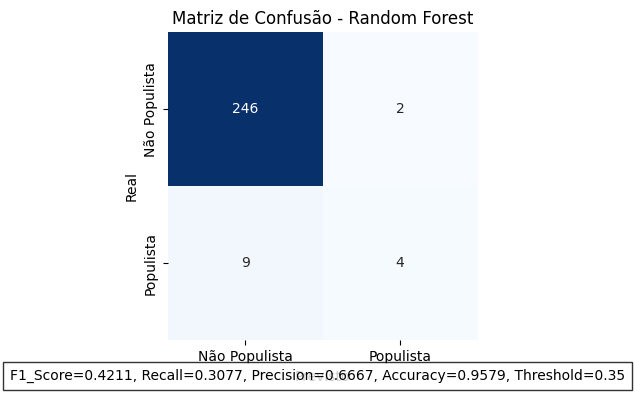

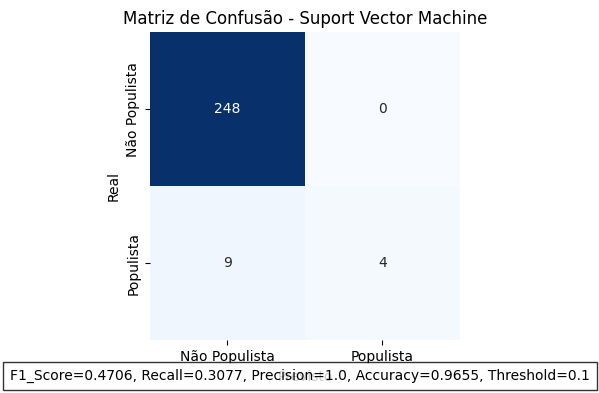

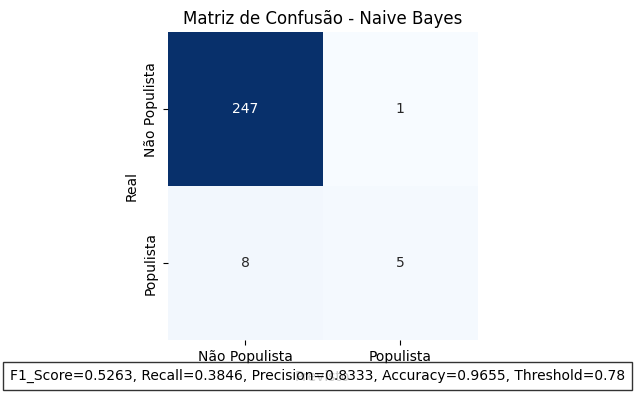

In [103]:
evaluate_model(rf, X_test_tfidf, y_test, model_type="ml", model_name="Random Forest")
evaluate_model(svm, X_test_tfidf, y_test, model_type="ml", model_name="Suport Vector Machine")
evaluate_model(nb, X_test_tfidf, y_test, model_type="ml", model_name="Naive Bayes")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


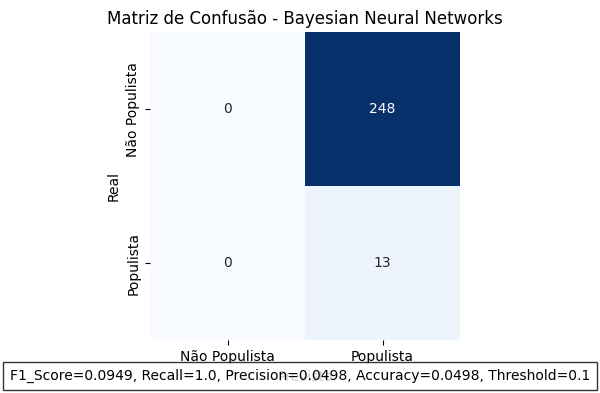

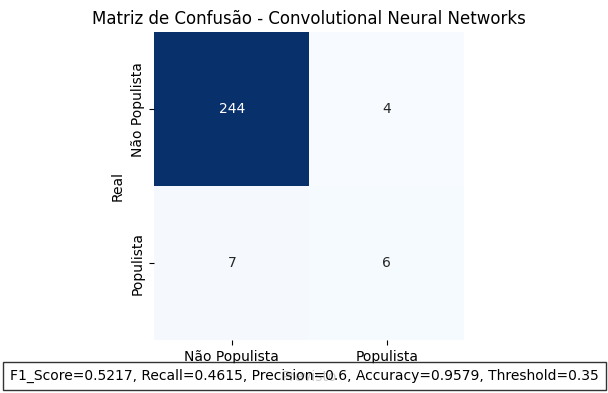

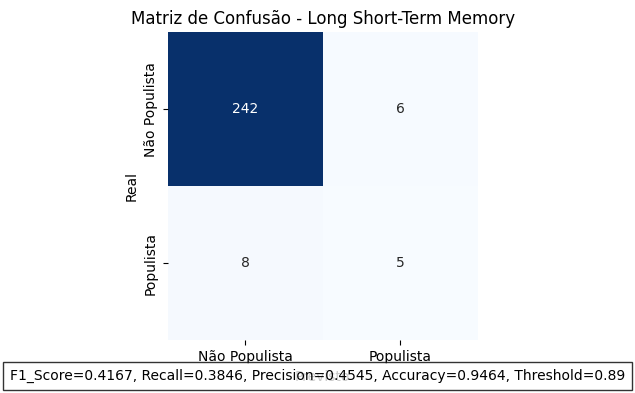

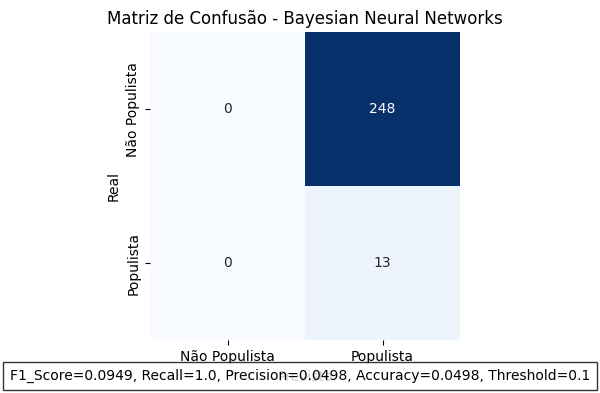

In [130]:
evaluate_model(cnn_model, X_test_pad, y_test, model_type="dl", model_name='Convolutional Neural Networks')
evaluate_model(lstm_model, X_test_pad, y_test, model_type="dl", model_name='Long Short-Term Memory')
evaluate_model(bnn_model, X_test_pad, y_test, model_type="dl", model_name='Bayesian Neural Networks')

In [132]:
def show_wrong_predictions(model, X_test, y_test, X_test_original, threshold=0.5):
    """
    Mostra as previsões incorretas do modelo, juntamente com a classificação errada e o texto original.

    Args:
        model: O modelo treinado.
        X_test: Dados de teste processados.
        y_test: Rótulos reais.
        X_test_original: Dados de teste originais (texto).
        threshold: Limiar para classificação binária.
    """

    y_pred_prob = model.predict(X_test).flatten()
    y_pred = (y_pred_prob > threshold).astype("int32")

    wrong_predictions = []
    for i in range(len(y_test)):
        if y_test.iloc[i] != y_pred[i]:
            wrong_predictions.append({
                'text': X_test_original.iloc[i],
                'true_label': y_test.iloc[i],
                'predicted_label': y_pred[i],
                'predicted_probability': y_pred_prob[i]
            })

    for pred in wrong_predictions:
      print(f"Texto: {pred['text']}")
      print(f"Rótulo correto: {pred['true_label']}")
      print(f"Rótulo previsto: {pred['predicted_label']}")
      print(f"Probabilidade prevista: {pred['predicted_probability']}")
      print("-" * 20)

# Exemplo de uso (substitua pelo seu modelo e dados)
# Certifique-se de que X_test_original contenha as frases originais
show_wrong_predictions(cnn_model, X_test_pad, y_test, populista['frases'])


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Texto: ontem, tivemos uma reunião e só ouvíamos falar  -  simon não, que é o do rio grande do sul  -  mas nós do nordeste nunca ouvimos falar em números tão grandes: trilhões, déficit de trilhões, mais trilhões.
Rótulo correto: True
Rótulo previsto: 0
Probabilidade prevista: 0.391349732875824
--------------------
Texto: depois, aliviados do incidente, ouvi de gilberto um hino ao brasil, e foi surpresa para mim ouvir, repetido, aqui nesta casa, no seu discurso dê posse, o que ele mesmo me dissera naquela tarde: «a palavra brasil ressoará, ressoará na sua voz pelo infinito. . . . um brasil de problemas resolvidos, economia organizada, riqueza bem distribuída, saúde, ordem interna assegurada e aceita na satisfação popular, justiça social efetiva, pobres tornando-se ricos, ricos contribuindo para a prosperidade geral, tudo certo, tudo equilibrado, tudo num grande ritmo, dentro da grande luz. . . .
Rótulo correto: True
Rótulo previsto: 0
Probabilidade p

#### Classificações com Generative AI

Modelos Chat GPT

#### Tunning de Hiper Parâmetros

Machine Learning models

In [133]:
# Define the parameter grid for models
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

nb_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'fit_prior': [True, False]
}


rf_tuned = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=5, scoring=['f1', 'recall'], refit='f1', n_jobs=-1)
svm_tuned = GridSearchCV(estimator=svm, param_grid=svm_param_grid, cv=5, scoring=['f1', 'recall'], refit='f1', n_jobs=-1)
nb_tuned = GridSearchCV(estimator=nb, param_grid=nb_param_grid, cv=5, scoring=['f1', 'recall'], refit='f1', n_jobs=-1)

rf_tuned.fit(X_resampled_tfidf, y_resampled)
svm_tuned.fit(X_resampled_tfidf, y_resampled)
nb_tuned.fit(X_resampled_tfidf, y_resampled)

rf_best = rf_tuned.best_estimator_.get_params()
svm_best = svm_tuned.best_estimator_.get_params()
nb_best = nb_tuned.best_estimator_.get_params()

print("Melhores parâmetros para SVM:", rf_best)
print("Melhores parâmetros para SVM:", svm_best)
print("Melhores parâmetros para SVM:", nb_best)

evaluate_model(rf_tuned, X_test_tfidf, y_test, model_type="ml", model_name="Random Forest")
evaluate_model(svm_tuned, X_test_tfidf, y_test, model_type="ml", model_name="Suport Vector Machine")
evaluate_model(nb_tuned, X_test_tfidf, y_test, model_type="ml", model_name="Naive Bayes")

KeyboardInterrupt: 

Neural Networks models

In [123]:
rf_best = rf_tuned.best_estimator_.get_params()
svm_best = svm_tuned.best_estimator_.get_params()
nb_best = nb_tuned.best_estimator_.get_params()

print("Melhores parâmetros para Random Forest:", rf_best)
print("Melhores parâmetros para Suport Vector Machine:", svm_best)
print("Melhores parâmetros para Naive Bayes:", nb_best)

Melhores parâmetros para Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Melhores parâmetros para Suport Vector Machine: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Melhores parâmetros para Naive Bayes: {'alpha': 0.001, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}


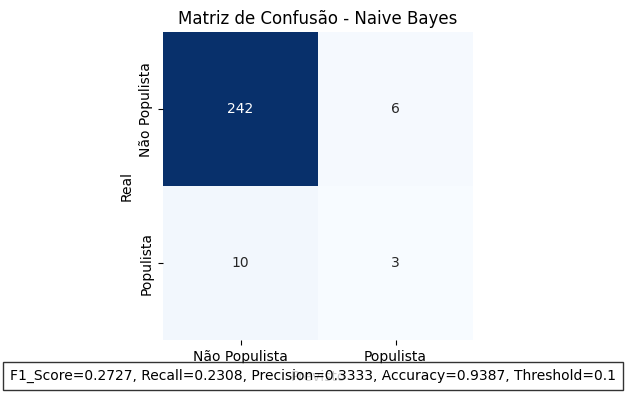

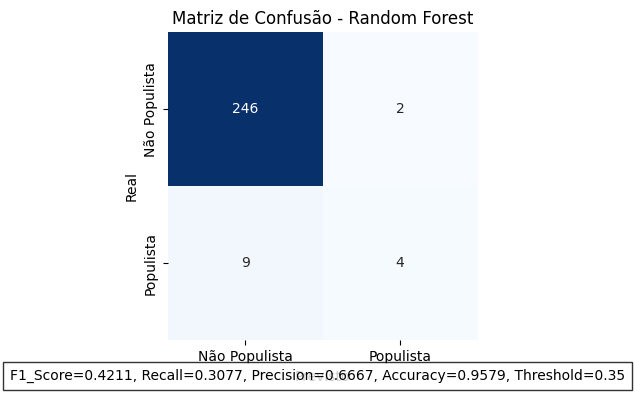

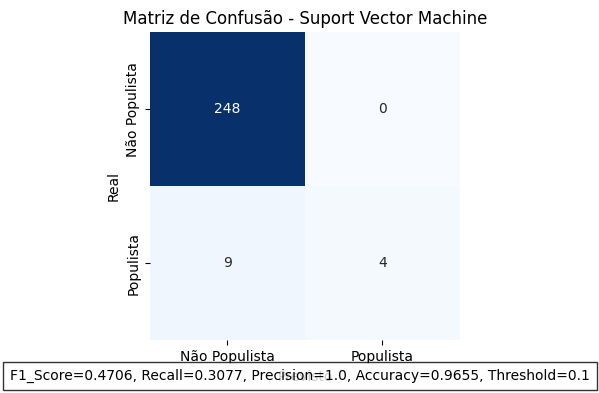

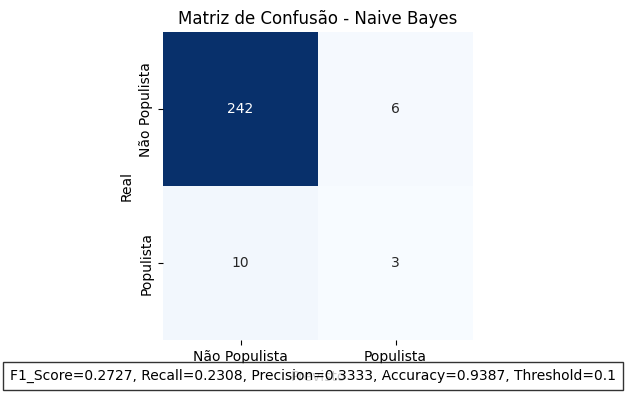

In [122]:
evaluate_model(rf_tuned, X_test_tfidf, y_test, model_type="ml", model_name="Random Forest")
evaluate_model(svm_tuned, X_test_tfidf, y_test, model_type="ml", model_name="Suport Vector Machine")
evaluate_model(nb_tuned, X_test_tfidf, y_test, model_type="ml", model_name="Naive Bayes")

In [137]:
!pip install scikeras==0.1.1
!pip install scikit-learn==1.3.0

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

# Supondo que as seguintes variáveis globais já estejam definidas:
# MAX_WORDS, MAX_LEN, EMBEDDING_DIM
# E os dados de treinamento de deep learning:
# X_train_pad e y_resampled

# Definir um scorer customizado para o F1-score (assumindo problema binário)
f1_scorer = make_scorer(f1_score)

##############################################
# Modelo 1: Convolutional Neural Network (CNN)
##############################################
def build_cnn_model(filters=128, kernel_size=5, dense_units=64, learning_rate=1e-3):
    model = Sequential()
    model.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN))
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.F1Score(), tf.keras.metrics.Recall()])
    return model

# Grid de hiperparâmetros para o CNN
cnn_param_grid = {
    'filters': [64, 128],
    'kernel_size': [2, 3, 5],
    'dense_units': [16, 32, 64],
    'learning_rate': [1e-3, 1e-4],
    'epochs': [7],       # Número de épocas para o tuning (ajuste conforme necessário)
    'batch_size': [16, 32, 64]
}

# Wrapper do modelo CNN
cnn_clf = KerasClassifier(build_fn=build_cnn_model, verbose=0) # use build_fn

# GridSearchCV para o CNN
cnn_grid = GridSearchCV(estimator=cnn_clf, param_grid=cnn_param_grid, cv=3, scoring=['f1', 'recall'], refit='f1', n_jobs=-1)
cnn_grid.fit(X_train_pad, y_resampled)
print("Melhores parâmetros para CNN:", cnn_grid.best_params_)

##############################################
# Modelo 2: Long Short-Term Memory (LSTM)
##############################################
def build_lstm_model(lstm_units=64, dense_units=64, dropout_rate=0.2, learning_rate=1e-3):
    model = Sequential()
    model.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN))
    model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
    model.add(Bidirectional(LSTM(lstm_units)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.F1Score(), tf.keras.metrics.Recall()])
    return model

# Grid de hiperparâmetros para o LSTM
lstm_param_grid = {
    'lstm_units': [16, 32, 64],
    'dense_units': [16, 32, 64],
    'dropout_rate': [0.2, 0.5],
    'learning_rate': [1e-3, 1e-4],
    'epochs': [7],
    'batch_size': [16, 32, 64]
}

# Wrapper do modelo LSTM
lstm_clf = KerasClassifier(build_fn=build_lstm_model, verbose=0) # use build_fn

# GridSearchCV para o LSTM
lstm_grid = GridSearchCV(estimator=lstm_clf, param_grid=lstm_param_grid, cv=3, scoring=['f1', 'recall'], refit='f1', n_jobs=-1)
lstm_grid.fit(X_train_pad, y_resampled)
print("Melhores parâmetros para LSTM:", lstm_grid.best_params_)

###############################################################
# Modelo 3: Bayesian Neural Network (BNN) com dropout como regularização
###############################################################
def build_bnn_model(lstm_units=64, dense_units=64, dropout_rate=0.5, learning_rate=1e-3):
    model = Sequential()
    model.add(Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_LEN))
    model.add(LSTM(lstm_units, return_sequences=True, dropout=dropout_rate))
    model.add(LSTM(lstm_units, dropout=dropout_rate))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.F1Score(), tf.keras.metrics.Recall()])
    return model

# Grid de hiperparâmetros para o BNN
bnn_param_grid = {
    'lstm_units': [32, 64],
    'dense_units': [32, 64],
    'dropout_rate': [0.3, 0.5],
    'learning_rate': [1e-3, 1e-4],
    'epochs': [3],
    'batch_size': [32, 64]
}

# Wrapper do modelo BNN
bnn_clf = KerasClassifier(build_fn=build_bnn_model, verbose=0) # use build_fn

# GridSearchCV para o BNN
bnn_grid = GridSearchCV(estimator=bnn_clf, param_grid=bnn_param_grid, cv=3, scoring=['f1', 'recall'], refit='f1', n_jobs=-1)
bnn_grid.fit(X_train_pad, y_resampled)
print("Melhores parâmetros para BNN:", bnn_grid.best_params_)


ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.7.0,<3.11.0; 0.2.0 Requires-Python >=3.6.7,<3.9; 0.2.1 Requires-Python >=3.6.7,<3.9; 0.6.0 Requires-Python >=3.7.0,<3.10.0; 0.6.1 Requires-Python >=3.7.0,<3.10.0; 0.7.0 Requires-Python >=3.7.0,<3.10.0; 0.8.0 Requires-Python >=3.7.0,<3.11.0; 0.9.0 Requires-Python >=3.7.0,<3.11.0
ERROR: Could not find a version that satisfies the requirement scikeras==0.1.1 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.3.0, 0.3.1, 0.3.3, 0.4.0, 0.4.1, 0.11.0, 0.12.0, 0.13.0)
ERROR: No matching distribution found for scikeras==0.1.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 97.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

AttributeError: 'super' object has no attribute '__sklearn_tags__'